# FAKE NEWS DETECTOR

In [13]:
#import dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import seaborn as sns

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the training dataset

df = pd.read_csv("train_news.csv")

In [3]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
# dropping the unnammed column and the id column:
df = df.iloc[:,2:]

In [5]:
## total number of records in the dataset
df.shape

(20800, 4)

We have records 200 short of 21K

In [6]:
# let's check for the missing values in the dataset
df.isna().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

<AxesSubplot:>

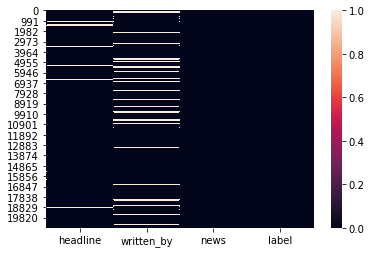

In [7]:
sns.heatmap(df.isna())

In [8]:
df.iloc[46,:]

headline                        مذكرة مفاهيمية عن رئاسة الروسية
written_by                                      voltairenet.org
news          اجتماع لمجلس الأمن من 28 أكتوبر 2016\nمذكرة مف...
label                                                         1
Name: 46, dtype: object

There are non -englist words in the nes also , we need to remove tham as well

In [9]:
# first lets treat the missing values in the datasets

df.headline.fillna('notavailable',inplace=True)
df.written_by.fillna('unknown',inplace=True)
df.news.fillna('text',inplace=True)

In [10]:
df.isna().sum()


headline      0
written_by    0
news          0
label         0
dtype: int64

In [11]:
df[df.label == 0]['headline']

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
6        Rapid Evolution Saved This Fish From Pollution...
                               ...                        
20790    A Suburban Experiment Aims for Free Energy - T...
20793    Assad’s History of Chemical Attacks, and Other...
20794    One Police Shift: Patrolling an Anxious Americ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: headline, Length: 10387, dtype: object

<AxesSubplot:xlabel='headline', ylabel='Density'>

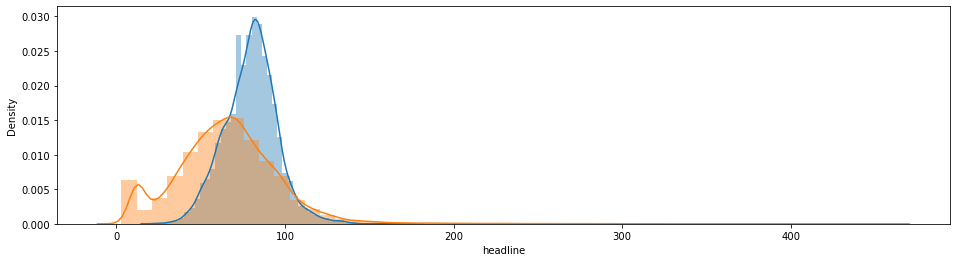

In [14]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0]['headline'].str.len())
sns.distplot(df[df.label == 1]['headline'].str.len())

Most of the headlines have between 50 to 120 words.

Fake news are less word count in the title relative to genuine news records.

# Data Processing

let's combine headline and the written by features since written_by alone would not provide much vlues sinces it's mostly names of the authors.

In [15]:
df['head_auth'] = df.headline + ' ' + df.written_by

In [16]:
df.head()

,headline,written_by,news,label,head_auth
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham


In [17]:
import re

In [18]:
url = re.compile(r'https?://\S+|www\.\S+')

In [19]:
# function to remove url from the feautre if any
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [20]:
# function to remove any html code from the feature if any
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [21]:
# remove extra spaces if 2 or more consecutive spaces are present

In [24]:
df.head_auth= df.head_auth.apply(lambda x: remove_URL(x))
df.head_auth = df.head_auth.apply(lambda x: remove_html(x))

In [25]:
df.news = df.news.apply(lambda x: remove_URL(x))
df.news = df.news.apply(lambda x: remove_html(x))

# NLP Processor


In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [27]:
# Training data



def nlp_preprocessor(X,col):
    corpus_train=[]
    ps = PorterStemmer()
    for i in range(len(X)):
        input = re.sub('[^a-zA-Z]',' ',X[col][i]) # except a-z and A-Z, substitute all other characters with ' '
        input = input.lower() # Lower case 
        input  = input.split() # tokenize the text
        input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
        text = ' '.join(input)  # concatenating all words into a single text (list is created)#
        corpus_train.append(text) # appending text into a single corpus #
    print("The length of the corpus train is: ", len(corpus_train))
    return corpus_train

In [28]:
data = nlp_preprocessor(df,'news')

The length of the corpus train is:  20800


In [29]:
cleaned_news = data.copy()

In [30]:
cleaned_head_auth = nlp_preprocessor(df,'head_auth')

The length of the corpus train is:  20800


In [32]:
cleaned_df = pd.DataFrame(list(zip(cleaned_news,cleaned_head_auth,df.label)),columns=['cleaned_news','cleaned_head_auth','label'])


# WordCloud

In [33]:
from wordcloud import WordCloud
from PIL import Image
import requests

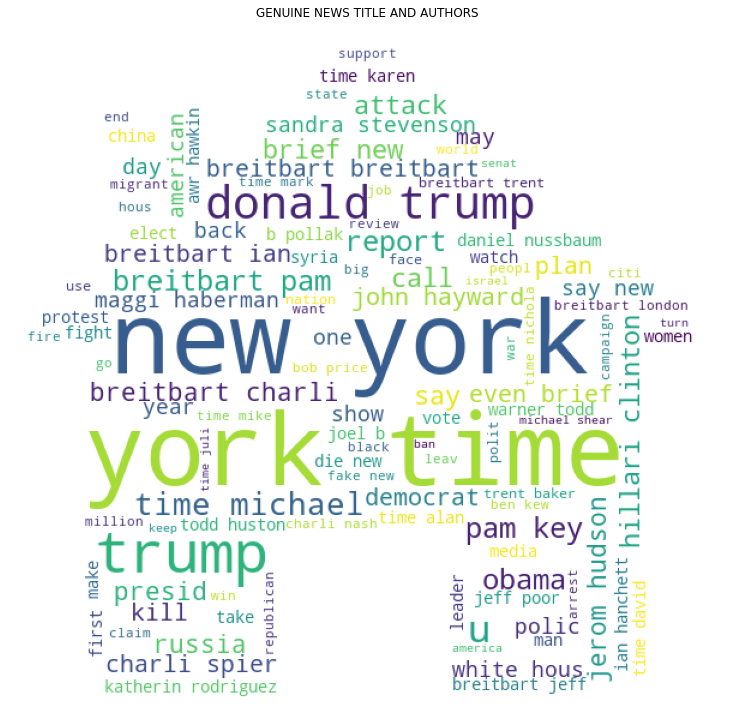

In [34]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 0]['cleaned_head_auth']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('GENUINE NEWS TITLE AND AUTHORS')
plt.show()

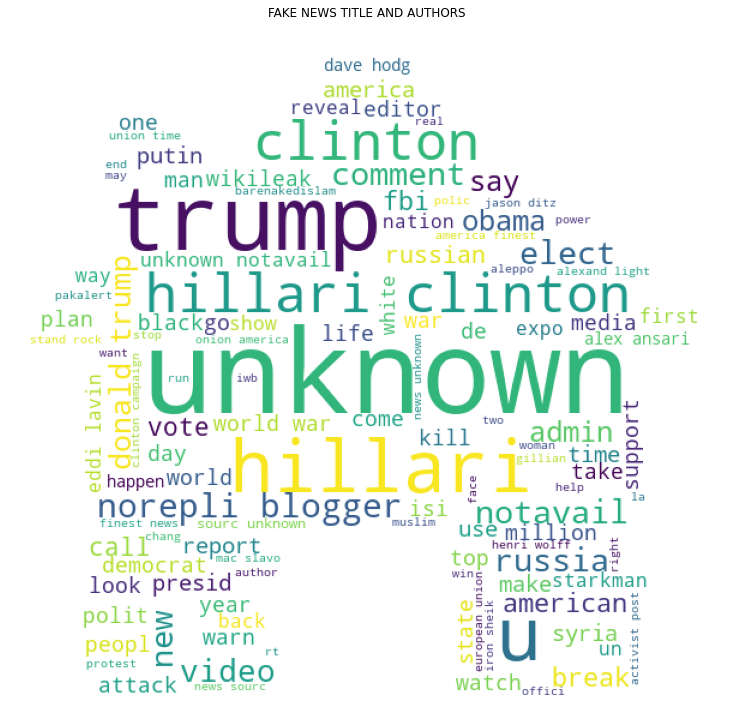

In [35]:

pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_head_auth']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('FAKE NEWS TITLE AND AUTHORS')
plt.show()

Check the authours of the fake news are very suspicius and not be speicified a proper name.

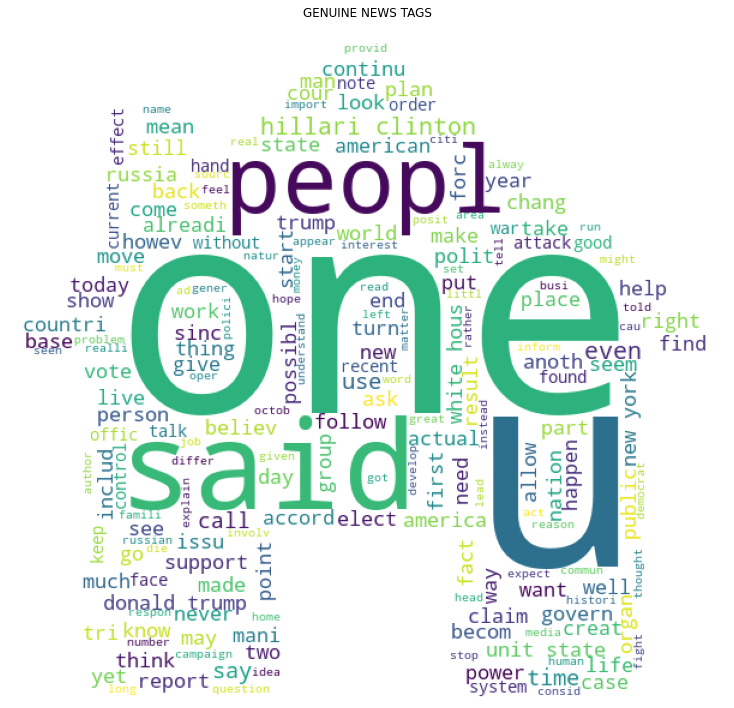

In [36]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_news']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('GENUINE NEWS TAGS')
plt.show()

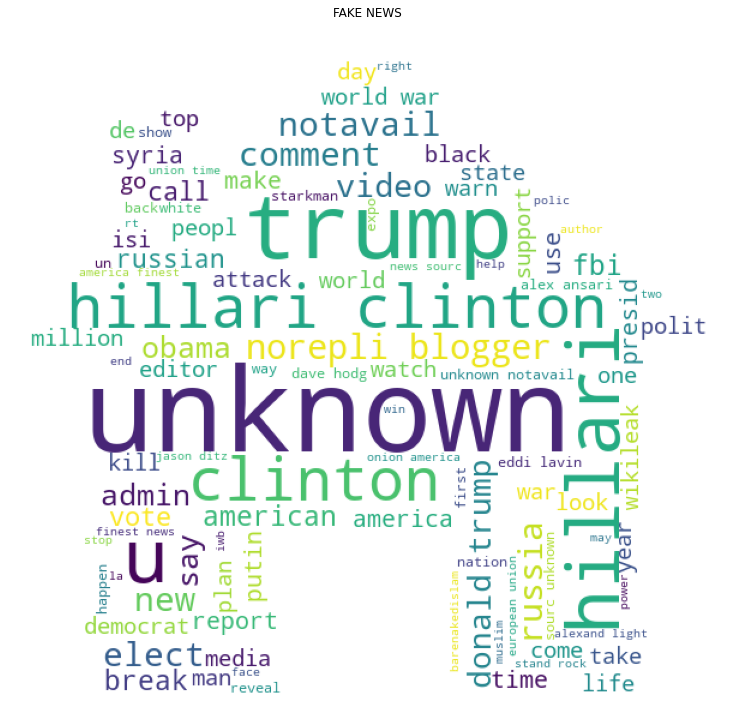

In [37]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))

spams = cleaned_df[cleaned_df.label == 1]['cleaned_head_auth']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                mask = pic, 
                min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('FAKE NEWS')
plt.show()

We can note the most of the fake news are crcle arounf trump, cliton, russia and politics.

# Saving the cleaned data

In [38]:
#saving the cleaned data
cleaned_df.to_csv('cleaned_data.csv',index=False,columns=cleaned_df.columns)


cleaned_df.dropna(inplace=True)

# Train and Test split

In [39]:
training_data = cleaned_df.iloc[:17000,:]
testing_data = cleaned_df.iloc[17000:,:2]

In [40]:
testing_data_ground_truth = cleaned_df.iloc[17000:,-1]

In [41]:
training_data.shape

(17000, 3)

In [42]:
testing_data.shape

(3800, 2)

In [43]:
training_data.head()

,cleaned_news,cleaned_head_auth,label
0,washington sonni perdu tell georgian grow wear...,ethic question dog agricultur nomine georgia g...,0
1,houston venezuela plan tactic approach design ...,u must dig deep stop argentina lionel messi ne...,0
2,sunday abc week discuss republican plan repeal...,cotton hous walk plank vote bill cannot pass s...,0
3,augusta beleagu republican governor main seem ...,paul lepag besieg main governor send conflict ...,0
4,finian cunningham written extens intern affair...,digit trump win finian cunningham,1


In [44]:
testing_data.head()

,cleaned_news,cleaned_head_auth
17000,gilad atzmon novemb gilad atzmon gilad co uk n...,trump whistl dog gilad atzmon
17001,absolut shock ministri defens report circul kr...,day obama throw top us marin gener jail allow ...
17002,north korea fifth nuclear test produc explos f...,kim latest big bang eric margoli
17003,watch blacklivesmatt cop hater slap polic hors...,watch blacklivesmatt cop hater slap polic hors...
17004,wed oct utc roam street sacramento six year ra...,controversi dna search help nab grim sleeper s...


# Feature Target Split

In [45]:
X = training_data.iloc[:,:-1]
y = training_data.iloc[:,-1]

In [46]:
X.shape,y.shape

((17000, 2), (17000,))

# Training and validation split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((11900, 2), (11900,), (5100, 2), (5100,))

# Tokenization/Vectorization

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [52]:
cv2 =  CountVectorizer(max_features=5000,ngram_range=(1,3))

In [54]:
X_train_vect = cv.fit_transform(X_train.cleaned_news).toarray()

In [55]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
X_val_vect = cv.transform(X_val.cleaned_news).toarray()

In [57]:
X_val_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X_train_vect.shape,X_val_vect.shape

((11900, 5000), (5100, 5000))

# Model building

In [59]:
def train_n_pred_model(model_name):
    model_name.fit(X_train_vect,y_train)
    y_preds = model_name.predict(X_val_vect)
    print("Log loss -->" , log_loss(y_val,y_preds))
    print("Recall -->" , recall_score(y_val,y_preds))
    print("Precision -->" , precision_score(y_val,y_preds))
    print("F1 Score --> ",f1_score(y_val,y_preds))
    print("Classification Report --> \n", classification_report(y_val,y_preds))

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [61]:
train_n_pred_model(LogisticRegression(max_iter=1000))

Log loss --> 1.7405041334025166
Recall --> 0.9509419152276295
Precision --> 0.9483365949119373
F1 Score -->  0.9496374681559866
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2552
           1       0.95      0.95      0.95      2548

    accuracy                           0.95      5100
   macro avg       0.95      0.95      0.95      5100
weighted avg       0.95      0.95      0.95      5100



In [62]:
train_n_pred_model(DecisionTreeClassifier())

Log loss --> 3.8670312963906754
Recall --> 0.8830455259026687
Precision --> 0.89179548156956
F1 Score -->  0.8873989351212779
Classification Report --> 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      2552
           1       0.89      0.88      0.89      2548

    accuracy                           0.89      5100
   macro avg       0.89      0.89      0.89      5100
weighted avg       0.89      0.89      0.89      5100



In [63]:
train_n_pred_model(RandomForestClassifier())


Log loss --> 1.936901410784334
Recall --> 0.9403453689167975
Precision --> 0.9470355731225296
F1 Score -->  0.9436786136274123
Classification Report --> 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      2552
           1       0.95      0.94      0.94      2548

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



In [64]:
train_n_pred_model(AdaBoostClassifier())

Log loss --> 2.160398115501957
Recall --> 0.9536891679748822
Precision --> 0.9236031927023945
F1 Score -->  0.9384050975091717
Classification Report --> 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2552
           1       0.92      0.95      0.94      2548

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



In [65]:
train_n_pred_model(GaussianNB())

Log loss --> 4.7677883861686805
Recall --> 0.9309262166405023
Precision --> 0.8179310344827586
F1 Score -->  0.8707782672540382
Classification Report --> 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      2552
           1       0.82      0.93      0.87      2548

    accuracy                           0.86      5100
   macro avg       0.87      0.86      0.86      5100
weighted avg       0.87      0.86      0.86      5100



Logistic Regression is giving us the best results, let's do hyper parameter tuning on Logistic Regression

# Hyperparameter Tuning

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [69]:
model = LogisticRegression(max_iter=1000)
solvers = ['lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cross_val,n_jobs=-1, scoring='f1',error_score=0,verbose=3)

In [70]:
grid_search.fit(X_train_vect, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 18.2min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=0, estimator=LogisticRegression(max_iter=1000),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=3)

In [71]:
best_para= grid_search.best_params_
print(best_para)

{'C': 0.01, 'solver': 'liblinear'}


# Final Model

In [76]:
#Calling Model
from sklearn.pipeline import make_pipeline
model=make_pipeline(LogisticRegression( C=0.01,solver='liblinear',max_iter=1000 ))

In [75]:
test_vect = cv.transform(testing_data.cleaned_news).toarray()

In [77]:
model.fit(X_train_vect,y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=0.01, max_iter=1000,
                                    solver='liblinear'))])

In [78]:
test_prediction = model.predict(test_vect)

# Recall

In [79]:
recall_score(testing_data_ground_truth,test_prediction)

0.9621095750128008

# Precision

In [80]:
precision_score(testing_data_ground_truth,test_prediction)

0.9404404404404404

# F1-Score

In [81]:
f1_score(testing_data_ground_truth,test_prediction)

0.9511516071880537

# ROC_AUC Score

In [84]:
roc_auc_score(testing_data_ground_truth,test_prediction)


0.9488403857738611

# Classification Report

In [86]:
print(classification_report(testing_data_ground_truth,test_prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1847
           1       0.94      0.96      0.95      1953

    accuracy                           0.95      3800
   macro avg       0.95      0.95      0.95      3800
weighted avg       0.95      0.95      0.95      3800



# Confusion Matrix

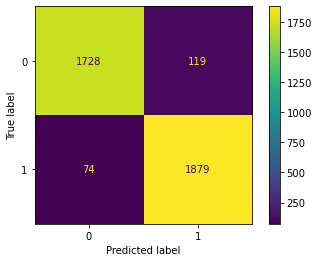

In [87]:
plot_confusion_matrix(model,test_vect,testing_data_ground_truth)

# Sensitivity and Specificity Curve

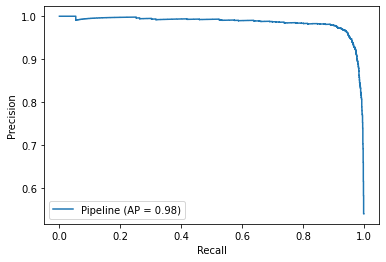

In [88]:
plot_precision_recall_curve(model,test_vect,testing_data_ground_truth)

# ROC CURVE

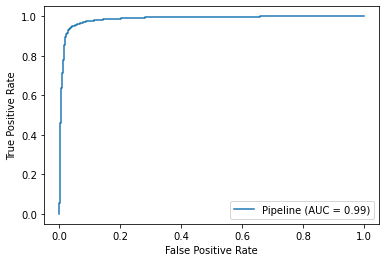

In [89]:
plot_roc_curve(model,test_vect,testing_data_ground_truth)

# Saving the final model

In [90]:
import joblib

In [91]:
joblib.dump(model,'fake_news_detector_model.pkl')

['fake_news_detector_model.pkl']